In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted 
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

Ma'lumotlar to'plamini `pandas` modulidagi `DataFrame` obyektiga o'qib olamiz

In [16]:
df = pd.read_csv('C:\\Users\\ravsh\\My Drive\\Projects\\Data Science & AI\\assets\\datasets\\zomato.csv')

# **Ma'lumotlar to'plamini tushunish**

Ma'lumotlar to'plamimizda qanday ustunlar va qanday qiymatlar borligini ko'zdan kechirish uchun uning dastlabki 5 ta qatorini chiqaramiz

In [17]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Ma'lumotlar to'plamimiz qanday o'lchamga ega ekanligini aniqlaymiz**

In [18]:
df.shape

(51717, 17)

**Endi `info()` metodi orqali umumiyroq tushunchalar olishga harakat qilamiz**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Haqiqiy va butun sonlardan iborat ustunlar haqida statistik ma'lumotlar olishga harakat qilamiz**

In [20]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


>Yuqorida faqatgina `votes` ustuni haqida ma'lumotlarni oldik. Sababi, faqatgina shu ustundagi qiymatlar butun son turida yozilgan. Keyinchalik boshqa kerakli ustunlarni haqiqiy yoki butun son turiga o'tkazib, ular haqida ham statistik ma'lumotlar olamiz

# **Ma'lumotlarni tozalash**

Ushbu qadamda ma'lumotlarni bir nechta bosqichda training uchun tayyorlaymiz

* ### **NaN qiymatlar**

Ma'lumotlar to'plamimizdagi tushirib qoldirilgan qiymatlarning sonini har bir ustun bo'yicha hisoblaymiz

In [21]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**To'plamimizning `dish_liked` ustunidan to'liqligicha voz kechamiz, chunki undagi ma'lumotlarning 50% dan ko'p qismi tushirib qoldirilgan.**

In [22]:
del df['dish_liked']

`phone`, `location`, `rest_type`, `cuisines`, `approx_cost(for two people)` ustunlaridagi yetishmayotgan qiymatlarni esa tashlab yuborganimiz ma'qul. Chunki, bizda 51700 dan oshiq ma'lumotlar bor, bu yo'qotishlar esa ma'lumotlar to'plamimizning o'lchamini keskin kamaytirib yubormaydi

In [23]:
df.dropna(subset=['phone', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)'], inplace=True)

Yetishmayotgan qiymatlar saqlanib qolgan faqatgina `rate` ustunigina qoldi. Ushbu ustundagi qiymatlarni birdaniga tashlab yubormaymiz. Keling uni boshqacharoq usulda hal qilishga urinib ko'ramiz.

In [24]:
null_rate_idx = df[(df['rate'].isnull()) & (df['votes']==0)].index

In [25]:
for i in null_rate_idx:
    df.loc[i, 'rate'] = 0

Qolgan barcha yetishmayotgan qiymatlarga ega qatorlarni esa tashlab yuborishimiz mumkin

In [26]:
df.dropna(inplace=True)

* ### **Keraksiz ustunlar**

Mavjud ustunlarning barchasi bizga zarur bo'lmaydi. Shu sababli, ularning ayrimlarini tashlab yuborishimiz mumkin

In [27]:
df.drop(['url', 'address', 'phone', 'reviews_list'], axis=1, inplace=True)

* ### **Qiymatlarni normallashtirish va standartlashtirish**

Keling endi har bir ustunda notabiiy qiymatlar bor yoki yo'qligini aniqlashtirib olamiz. Undan avval esa bizda nimalar qolganini ko'rishimiz mumkin

In [28]:
 df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


**`online_order` ustunidagi qiymatlarni tekshiramiz**

In [29]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

**`book_table` ustunidagi qiymatlarni tekshiramiz**

In [30]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

**`rate` ustunidagi qiymatlarni tekshiramiz**

In [31]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 0, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Ushbu ustundagi qiymatlar bu ko'rinishida biz uchun foydasiz. Qiymatlarni maksimal ballga bo'lish orqali foiz yoki koeffitsient ko'rinishida ifodalab olganimiz ma'qul. Masalan `4.1/5 = 0.82 = 82%` 

In [32]:
def adjust_rate(rate):
    try:
        given_rate, max_rate = rate.split('/')
        rate = round((float(given_rate) / float(max_rate)), 2)
        return rate
    except:
        return np.nan

In [33]:
df['rate'] = df['rate'].map(adjust_rate)

In [34]:
df.dropna(subset=['rate'], inplace=True)

**`votes` ustunidagi qiymatlarni tekshiramiz**

In [35]:
df['votes'].describe()

count    40687.000000
mean       354.067294
std        888.697885
min          0.000000
25%         21.000000
50%         74.000000
75%        278.000000
max      16832.000000
Name: votes, dtype: float64

**`location` ustunidagi qiymatlarni tekshiramiz**

In [36]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

**`rest_type` ustunidagi qiymatlarni tekshiramiz**

In [37]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

**`cuisines` ustunidagi qiymatlarni tekshiramiz**

In [38]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

Ushbu qiymatlar restoranlarda qaysi mamlakatlar taomlari tayyorlanishi haqidagi ma'lumotlarni o'zida jamlagan ekan. Bu qiymatlardan foydalanib, restoranda necha xil mamlakat taomlari tayyorlanishi haqidagi ma'lumotlarni olib, uni yangi `number_of_cuisines` ustuniga saqlaymiz

In [39]:
def get_cuisines_length(cuisines):
    try:
        cuisines_array = cuisines.split(',')
        return len(cuisines_array)
    except:
        return np.nan

In [40]:
df['number_of_cuisines'] = df['cuisines'].map(get_cuisines_length)

**`approx_cost(for two people)` ustunidagi qiymatlarni tekshiramiz**

In [41]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

Qiymatlar `object` turida va raqamlar orasida verguldan foydalanib yozilganini ko'rishimiz mumkin. Biz avvalo raqamlar orasidagi vergullarni yo'qotishimiz kerak.

In [42]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].map(lambda x: x.replace(',', ''))

Endi esa barcha qiymatlarni butun son turiga o'tkazamiz

In [43]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(np.int32)

Qiymatlar butun son turiga o'tgach, qiymatlar haqida statistik ma'lumotlar olishimiz mumkin.

In [44]:
df['approx_cost(for two people)'].describe()

count    40687.000000
mean       606.018040
std        466.329526
min         40.000000
25%        300.000000
50%        500.000000
75%        750.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

**`menu_item` ustunidagi qiymatlarni tekshiramiz**

In [45]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

Ushbu ustunda restoranlarda mavjud taomlarning ro'yxatlari saqlanganligini ko'rishimiz mumkin. Ushbu ustun shu holatda biz uchun foydasiz, lekin ushbu ustundan foydalanib, menudagi taomlarning sonini o'zida saqlaydigan ustunni yaratib olishimiz mumkin.

In [46]:
def get_item_lengths(string):
    items = eval(string)
    return len(items)

In [47]:
df['number_of_menu_items'] = df['menu_item'].map(get_item_lengths)

Endi esa hosil bo'lgan yangi ustun haqida ma'lumotlar olishimiz mumkin

In [48]:
df['number_of_menu_items'].describe()

count    40687.00000
mean        29.68909
std         65.03304
min          0.00000
25%          0.00000
50%          0.00000
75%         20.00000
max        715.00000
Name: number_of_menu_items, dtype: float64

`menu_item` ustunining o'zi esa bizga ortiq kerak bo'lmaydi. Shuning uchun uni tashlab yuborishimiz mumkin.

In [49]:
del df['menu_item']

**`listed_in(type)` ustunidagi qiymatlarni tekshiramiz**

In [50]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

**`listed_in(city)` ustunidagi qiymatlarni tekshiramiz**

In [51]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

* ### **Dublikat qiymatlar**

Qatorlarda takroriy yozilganlari mavjudligini tekshiramiz. Dastlab bizda bunday takroriy ma'lumotlar bo'lmagan bo'lsa ham, keraksiz ustunlarni tashlab yuborganimizdan so'ng ayrim qatorlar xuddi takroriy yozilgandek bo'lib qolishi mumkin

In [52]:
df.duplicated().sum()

58

Takroriy qatorlarni tashlab yuboramiz

In [53]:
df.drop_duplicates(inplace=True)

* ### **Ma'lumotlarni saralash**

Restoranlarni ularga berilgan ovozlar soni va baholashlarga ko'ra saralaymi. Ko'proq ovoz berilgan va yuqoriroq baholanganlar yuqoriroqda

In [54]:
df.sort_values(by=['rate', 'votes'], ascending=False, inplace=True)

* ### **Ma'lumotlarni qayta indekslash**

In [55]:
df.index = np.arange(1, len(df) + 1)

# **Ma'lumotlarni vizullashtirish**

Ma'lumotlarni vizul ko'rinishda ifodalashdan avval, keling yuqoridagi bosqichlardan so'ng bizda qanday ma'lumotlar qolganligini ko'zdan kechirib olamiz

In [56]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),number_of_cuisines,number_of_menu_items
21655,Anand Donne Biriyani,Yes,No,0.74,46,Jayanagar,Quick Bites,Biryani,200,Dine-out,Jayanagar,1,0
24550,Swad 'E' Punjab,Yes,No,0.72,51,HSR,Casual Dining,"North Indian, Chinese, Mughlai",500,Dine-out,Koramangala 5th Block,3,0
40017,RBP Greens Garden,Yes,No,0.54,48,BTM,Casual Dining,"North Indian, Chinese",700,Delivery,Jayanagar,2,219
1766,YORK St.,Yes,No,0.88,946,Koramangala 5th Block,Cafe,"Cafe, European, Continental",900,Cafes,Koramangala 4th Block,3,117
12627,Naati Manae,Yes,Yes,0.78,485,Koramangala 5th Block,Casual Dining,"North Indian, South Indian, Chinese, Biryani",700,Delivery,Koramangala 5th Block,4,0


**Endi ma'lumotlarni vizuallashtirish orqali restoranlar haqidagi ayrim savollarga javob berishga va qiymatlar haqida yanada kengroq tushunchalar olishga harakat qilamiz**

* **Mijozlarning baholashlariga ko'ra qaysi restoranlar TOP10 da joylashgan?**

* **Qaysi 10 ta restoranlar mijozlar tomonidan eng past baholangan? Ovoz berilmagan va baholanmagan restoranlarni inobatga olmaymiz**

* **Restonlarning qancha qismida buyurtmalarni onlayn qabul qilish, qancha qismida onlayn stol band qilish  va qancha qismida ikkala xizmat ham mavjud?**

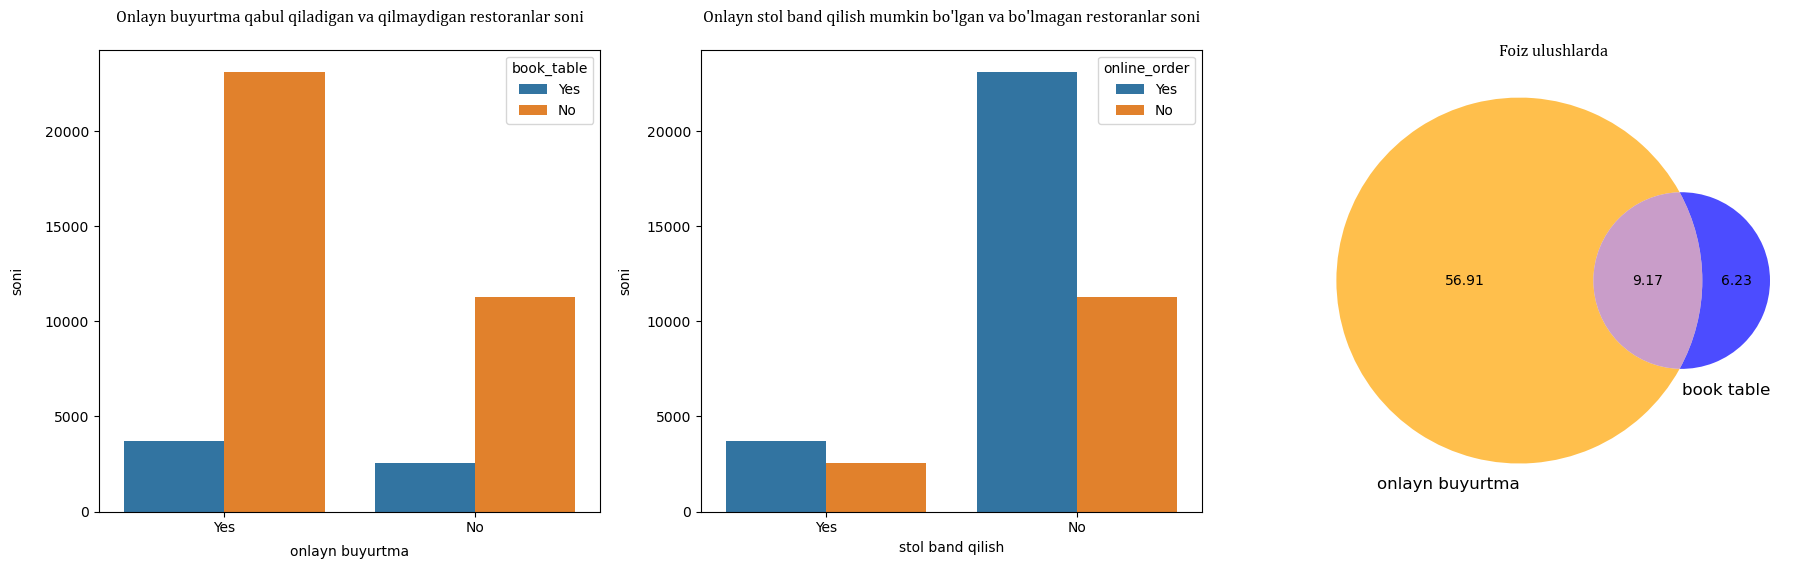

In [157]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)

plt.title('Onlayn buyurtma qabul qiladigan va qilmaydigan restoranlar soni', 
          fontdict={'size': '12', 'font': 'Cambria'},
          pad=20)
sns.countplot(data=df, x='online_order', hue='book_table')
plt.xlabel('onlayn buyurtma', labelpad=7)
plt.ylabel('soni', labelpad=15)



plt.subplot(1, 3, 2)
plt.title("Onlayn stol band qilish mumkin bo'lgan va bo'lmagan restoranlar soni", 
          fontdict={'size': '12', 'font': 'Cambria'},
          pad=20)
sns.countplot(data=df, x='book_table', hue='online_order')
plt.xlabel('stol band qilish')
plt.ylabel('soni', labelpad=10)



only_online_order = round(len(df[(df['online_order'] == 'Yes') & (df['book_table'] == 'No')]) / len(df) * 100, 2)
only_book_table = round(len(df[(df['book_table'] == 'Yes') & (df['online_order'] == 'No')]) / len(df) * 100, 2)
both_services = round(len(df[(df['book_table'] == 'Yes') & (df['online_order'] == 'Yes')]) / len(df) * 100, 2)

plt.subplot(1, 3, 3)
plt.title('Foiz ulushlarda', fontdict={'size': '12', 'font': 'Cambria'})
venn2(subsets=(only_online_order, only_book_table, both_services),  
      set_labels=('onlayn buyurtma', 'book table'), 
      set_colors=("orange", "blue"), alpha=0.7) 

plt.show()

* **Restoranlar eng ko'p joylashgan TOP10 manzillar qaysi?**

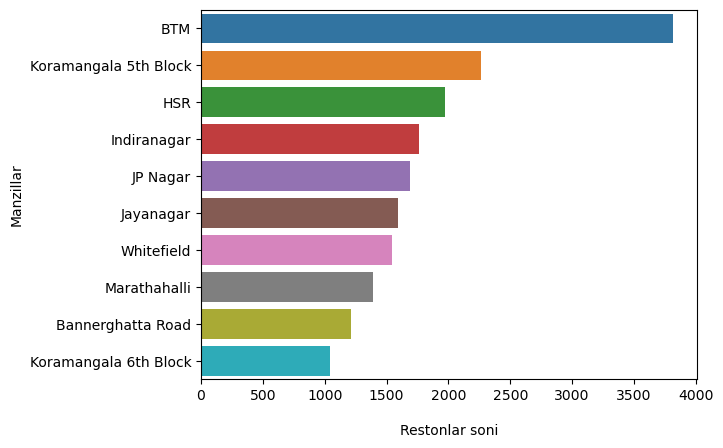

In [163]:
data = pd.DataFrame(df['location'].value_counts()[:10])

sns.barplot(x=data['count'], y=data.index)
plt.xlabel('Restonlar soni', labelpad=15)
plt.ylabel('Manzillar')

plt.show()

* **Bizda mavjud ovqatlanish narxlari qanday taqsimlangan?**

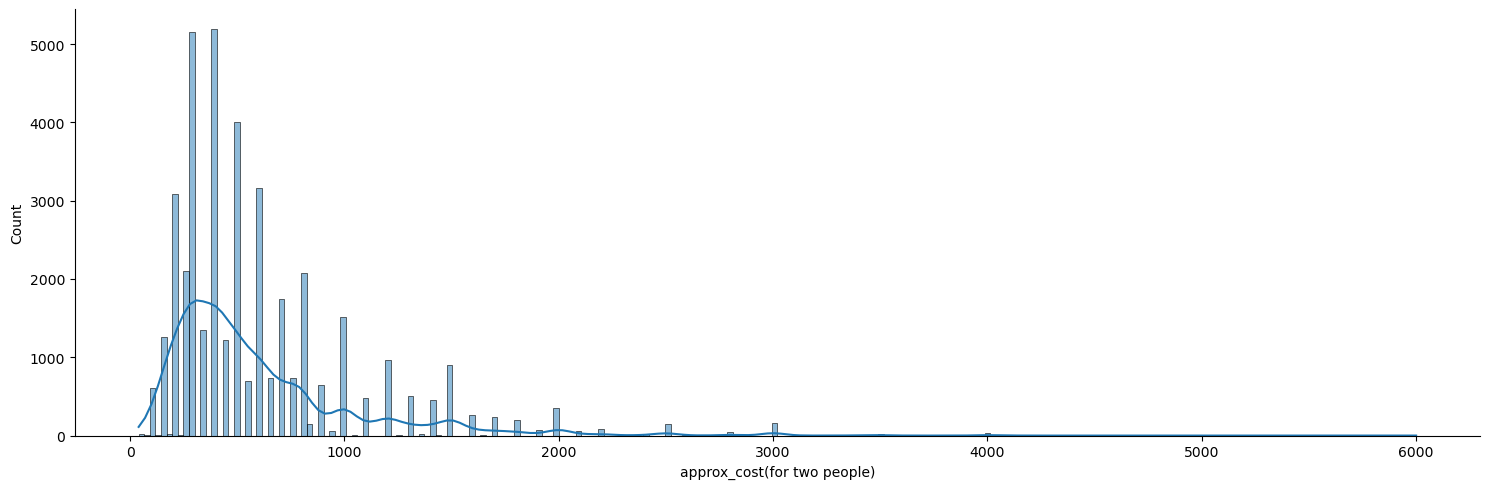

In [176]:
sns.displot(data=df, x='approx_cost(for two people)', kde=True, height=5, aspect=3)

plt.show()